<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase25_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPPORT VECTOR CLASSIFIER

La implementación de sklearn la podemos encontrar [acá](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/rakeshrau/social-network-ads

Las siguientes lineas lo descargan a su entorno de colab y lo importan como dataframe de pandas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("https://docs.google.com/uc?export=download&id=1aaPZi2Kc8K8ytNUYhOQl9s0xlj0BNtmF")

In [13]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Para nuestro problema, sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary`. Y como target a la columna `Purchased`

Separar en X e Y quedándonos con esas columnas:

In [14]:
X=df[['Age','EstimatedSalary']]
y=df['Purchased']

Luego, debemos separar los datos de entrenamiento de los datos de testing, mediante la función `train_test_split`.

Separar los datos en train-test:

Utilizar un test_size de 0.25 y random state de 0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Además, vamos a proceder a estandarizar los datos.

Utilizar un standardScaler. Recuerden hacer fit solo sobre train.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Vamos a realizar el entrenamiento de nuestra SVM.

Importar SVC de sklearn y entrenarlo.

Utilizar un valor de C=1, un kernel='linear' y un random_state de 0.

In [17]:
from sklearn.svm import SVC
classifier = SVC(C=1, kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

Una vez finalizado el entrenamiento, podemos realizar las predicciones sobre los datos de testing.

Guardar en una variable llamada Y_Pred las predicciones sobre el set de test.

In [18]:
Y_pred = classifier.predict(X_test)

Seguidamente, vamos a visualizar los resultados mediante:

* `Matriz de Confusión`
* `Reporte de Clasificación`
* `Gráfico de límites de Decisión`

Graficar la matriz de confusión:

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score = accuracy_score(y_test, Y_pred)
print(accuracy_score)
class_report = classification_report(y_test, Y_pred)
print(class_report)


[[66  2]
 [ 8 24]]
0.9
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



Imprimir el classification report utilizando la función de sklearn:

In [20]:
class_report = classification_report(y_test, Y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



El siguiente código, no es necesario mirarlo en detalle. Vamos a simplemente ejecutarlo para visualizar.

Es importante que tengan las variables definidas con los nombres:

X_Train, Y_Train. Si no, deberán modificar el código para poner los nombres que ustedes tengan.

Set de train:

<ipython-input-43-bee3e9e470ba>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


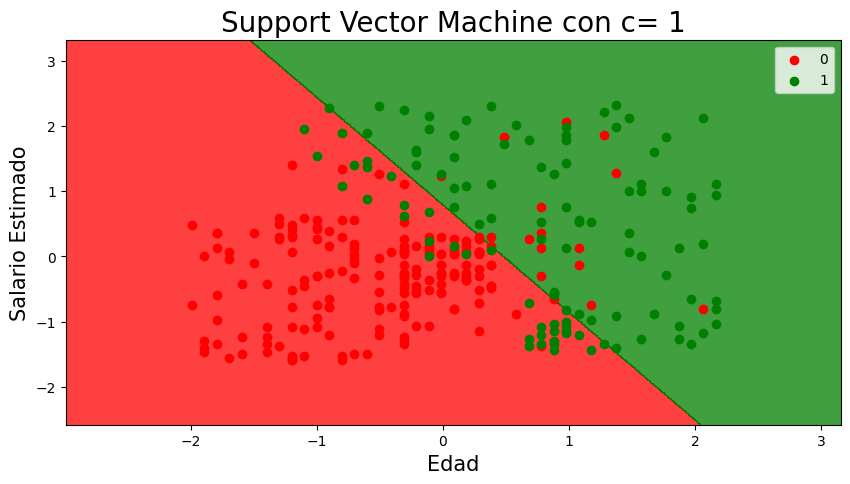

In [43]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, Y,c):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title(f'Support Vector Machine con c= {c}', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_train, y_train, 1)

Set de test:

(X_Test, Y_Test)

<ipython-input-43-bee3e9e470ba>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


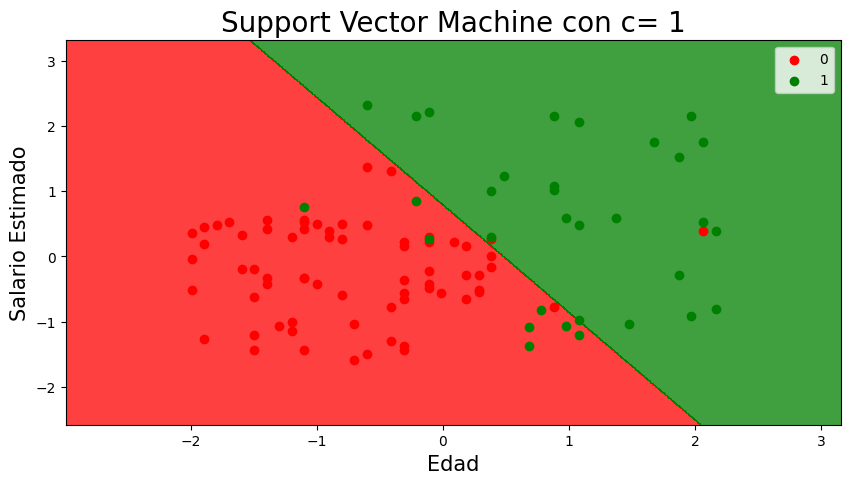

In [44]:
plot_decision_boundaries(X_test, y_test, 1)

Modificar el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance.

Train:

In [23]:
#COMPLETAR
classifier1 = SVC(C=1, kernel='poly', random_state=0)
classifier1.fit(X_train, y_train)

SVC(C=1, kernel='poly', random_state=0)

Test:

In [24]:
classifier1 = SVC(C=1, kernel='poly', random_state=0)
classifier1.fit(X_test, y_test)

SVC(C=1, kernel='poly', random_state=0)

Modificar el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`?

Train

<ipython-input-39-ef78d7f9461a>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


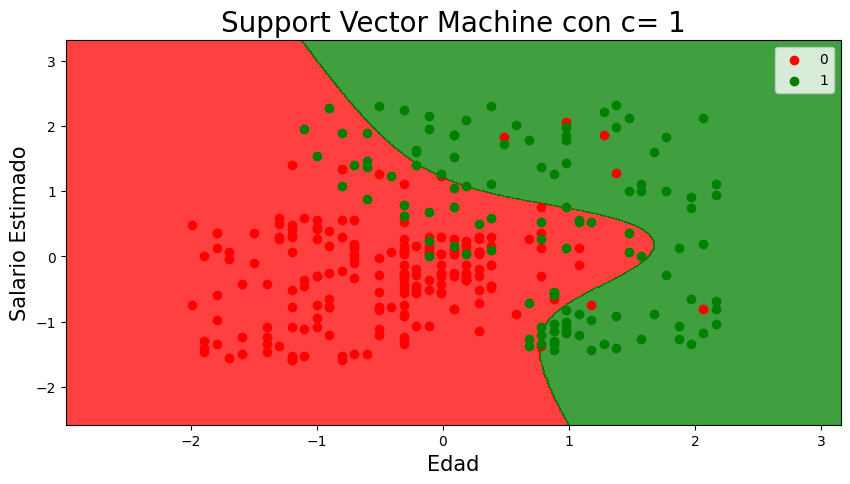

In [39]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, Y,c):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title(f'Support Vector Machine con c= {c}', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_train, y_train, 1)

<ipython-input-39-ef78d7f9461a>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


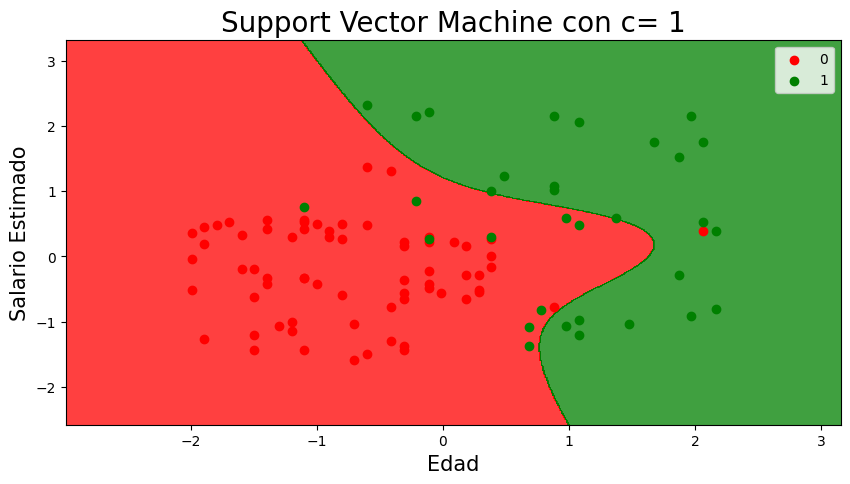

In [40]:
plot_decision_boundaries(X_test, y_test, 1)

In [27]:
classifier2 = SVC(C=5, kernel='poly', random_state=0)
classifier2.fit(X_train, y_train)

SVC(C=5, kernel='poly', random_state=0)

Test

In [28]:
classifier2 = SVC(C=5, kernel='poly', random_state=0)
classifier2.fit(X_test, y_test)

SVC(C=5, kernel='poly', random_state=0)

Utilizando GridSearchCV, buscar los mejores valores para c y kernel.

Probar:

C: 0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1

kernel: "linear", "poly", "rbf", "sigmoid"

In [33]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
grid = GridSearchCV(SVC(), grid_params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

¿Cuáles son los mejores hiperparámetros?

In [34]:
grid.best_params_

{'C': 0.7, 'kernel': 'rbf'}

¿Qué score obtiene el mejor clasificador?

In [35]:
grid.best_score_

0.9066666666666666

In [36]:
classifier3 = SVC(C=0.7, kernel='rbf', random_state=0)
classifier3.fit(X_test, y_test)

SVC(C=0.7, random_state=0)

<ipython-input-41-c7c40f760dd6>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


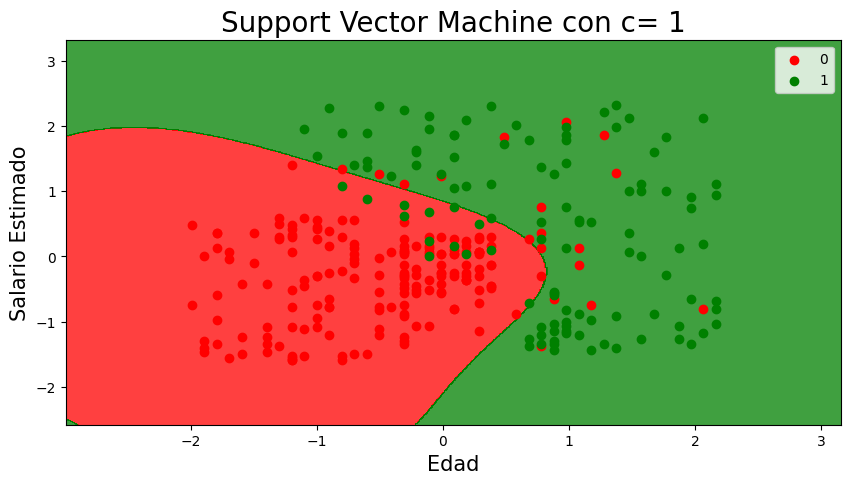

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, Y,c):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title(f'Support Vector Machine con c= {c}', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_train, y_train, 1)

<ipython-input-41-c7c40f760dd6>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


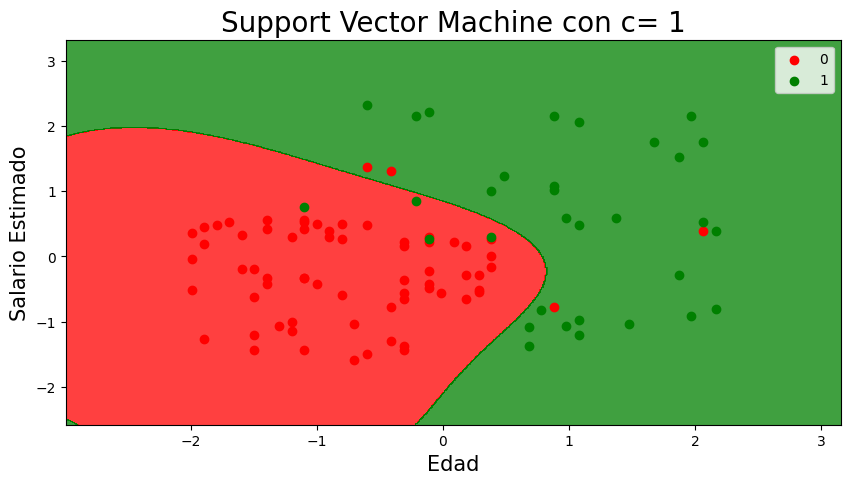

In [42]:
plot_decision_boundaries(X_test, y_test, 1)

In [45]:
classifier4 = SVC(C=1, kernel='sigmoid', random_state=0)
classifier4.fit(X_test, y_test)

SVC(C=1, kernel='sigmoid', random_state=0)

<ipython-input-46-9f4a9b21af1c>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


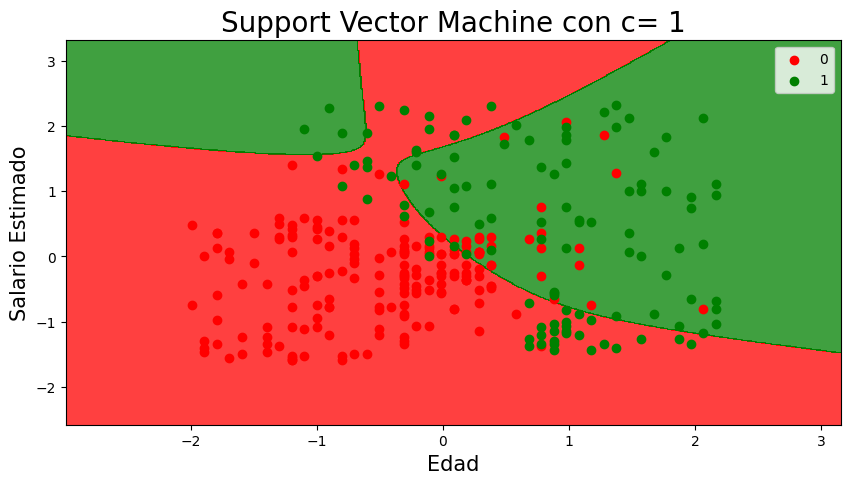

In [46]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, Y,c):
  X_Set, Y_Set = X, Y
  X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

  plt.figure(figsize=(10,5))
  plt.contourf(X1, X2, classifier4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(Y_Set)):
      plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title(f'Support Vector Machine con c= {c}', fontsize=20)
  plt.xlabel('Edad', fontsize=15)
  plt.ylabel('Salario Estimado', fontsize=15)
  plt.legend()
  plt.show()

plot_decision_boundaries(X_train, y_train, 1)

<ipython-input-46-9f4a9b21af1c>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


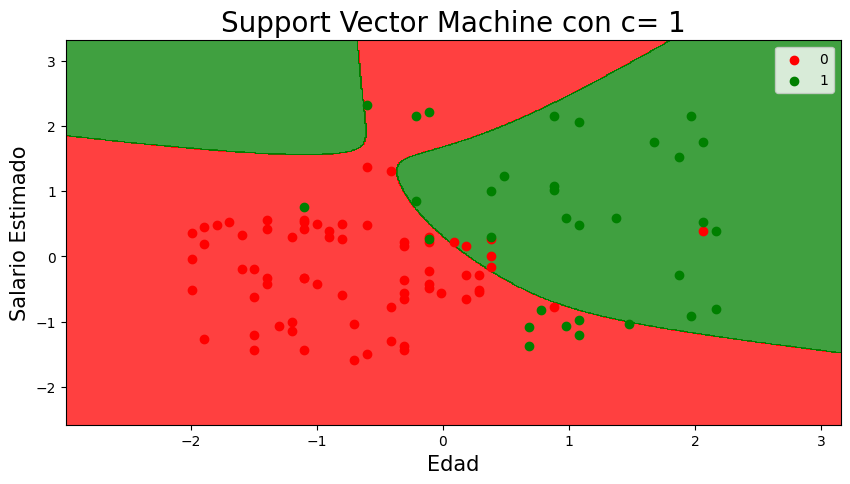

In [47]:
plot_decision_boundaries(X_test, y_test, 1)